In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import islice

In [3]:
# movies_df = pd.read_csv('./ml-1m/movies.dat', sep='::', header=None, engine='python', encoding='latin-1')
movies_df = pd.read_csv('./ml-latest-small/movies.csv')
print(movies_df)
len(movies_df)

      movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                                  Comedy|Romance  
3                            Comedy|Drama|Romance  
4                  

9742

In [4]:
# users = pd.read_csv('./ml-latest-small/ratings.csv').drop('timestamp', axis = 1)
# ratings_df = pd.read_csv('./ml-1m/ratings.dat', sep='::', header=None, engine='python', encoding='latin-1')
ratings_df = pd.read_csv('./ml-latest-small/ratings.csv')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [16]:
movies_df.columns = ['MovieID', 'Title', 'Genres']
ratings_df.columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']

,UserID,MovieID,Rating,Timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [19]:
user_rating_df = ratings_df.pivot(index='UserID', columns='MovieID', values='Rating')

norm_user_rating_df = user_rating_df.fillna(0) / 5.0
trX = norm_user_rating_df.values

trX[0:5]

array([[0.8, 0. , 0.8, ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0.8, 0. , 0. , ..., 0. , 0. , 0. ]])

In [7]:
hiddenUnits = 20
visibleUnits = len(user_rating_df.columns)
print(visibleUnits)
vb = tf.Variable(tf.zeros([visibleUnits]), tf.float32)  # Number of unique movies
hb = tf.Variable(tf.zeros([hiddenUnits]), tf.float32)  # Number of features were going to learn
W = tf.Variable(tf.zeros([visibleUnits, hiddenUnits]), tf.float32)  # Weight Matrix

9724


In [18]:
v0 = tf.zeros([visibleUnits], tf.float32)
tf.matmul([v0], W)

<tf.Tensor: shape=(1, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [9]:
#Phase 1: Input Processing
#defining a function to return only the generated hidden states 
def hidden_layer(v0_state, W, hb):
    h0_prob = tf.nn.sigmoid(tf.matmul([v0_state], W) + hb)  #probabilities of the hidden units
    h0_state = tf.nn.relu(tf.sign(h0_prob - tf.random.uniform(tf.shape(h0_prob)))) #sample_h_given_X
    return h0_state

#printing output of zeros input
h0 = hidden_layer(v0, W, hb)
print("first 15 hidden states: ", h0[0][0:15])

def reconstructed_output(h0_state, W, vb):
    v1_prob = tf.nn.sigmoid(tf.matmul(h0_state, tf.transpose(W)) + vb) 
    v1_state = tf.nn.relu(tf.sign(v1_prob - tf.random.uniform(tf.shape(v1_prob)))) #sample_v_given_h
    return v1_state[0]


v1 = reconstructed_output(h0, W, vb)
print("hidden state shape: ", h0.shape)
print("v0 state shape:  ", v0.shape)
print("v1 state shape:  ", v1.shape)

first 15 hidden states:  tf.Tensor([1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0.], shape=(15,), dtype=float32)
hidden state shape:  (1, 20)
v0 state shape:   (9724,)
v1 state shape:   (9724,)


In [10]:
epochs = 1
batchsize = 500
errors = []
weights = []
K=1
alpha = 0.1

In [11]:
def error(v0_state, v1_state):
    return tf.reduce_mean(tf.square(v0_state - v1_state))

err = tf.reduce_mean(tf.square(v0 - v1))
print("error" , err.numpy())

error 0.49095023


Epoch: 1 batch #: 0  of 1 sample #: 499 reconstruction error: 0.008071
Epoch: 1 batch #: 1  of 1 sample #: 109 reconstruction error: 0.102163
Epoch: 2 batch #: 0  of 1 sample #: 499 reconstruction error: 0.007721
Epoch: 2 batch #: 1  of 1 sample #: 109 reconstruction error: 0.103479
Epoch: 3 batch #: 0  of 1 sample #: 499 reconstruction error: 0.007865
Epoch: 3 batch #: 1  of 1 sample #: 109 reconstruction error: 0.101525
Epoch: 4 batch #: 0  of 1 sample #: 499 reconstruction error: 0.007289
Epoch: 4 batch #: 1  of 1 sample #: 109 reconstruction error: 0.101052
Epoch: 5 batch #: 0  of 1 sample #: 499 reconstruction error: 0.007845
Epoch: 5 batch #: 1  of 1 sample #: 109 reconstruction error: 0.101422


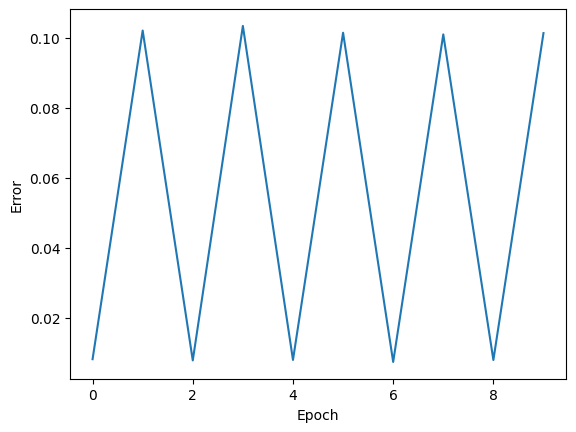

In [21]:
epochs = 5
batchsize = 500
errors = []
weights = []
K=1
alpha = 0.1

#creating datasets
train_ds = \
    tf.data.Dataset.from_tensor_slices((np.float32(trX))).batch(batchsize)



#for i in range(epochs):
#    for start, end in zip( range(0, len(trX), batchsize), range(batchsize, len(trX), batchsize)):
#        batch = trX[start:end]
#        cur_w = sess.run(update_w, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
#        cur_vb = sess.run(update_vb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
#        cur_nb = sess.run(update_hb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
#        prv_w = cur_w
#        prv_vb = cur_vb
#        prv_hb = cur_hb
#    errors.append(sess.run(err_sum, feed_dict={v0: trX, W: cur_w, vb: cur_vb, hb: cur_hb}))
#    print (errors[-1])
v0_state=v0
for epoch in range(epochs):
    batch_number = 0
    for batch_x in train_ds:

        for i_sample in range(len(batch_x)):           
            for k in range(K):
                v0_state = batch_x[i_sample]
                h0_state = hidden_layer(v0_state, W, hb)
                v1_state = reconstructed_output(h0_state, W, vb)
                h1_state = hidden_layer(v1_state, W, hb)

                delta_W = tf.matmul(tf.transpose([v0_state]), h0_state) - tf.matmul(tf.transpose([v1_state]), h1_state)
                W = W + alpha * delta_W

                vb = vb + alpha * tf.reduce_mean(v0_state - v1_state, 0)
                hb = hb + alpha * tf.reduce_mean(h0_state - h1_state, 0) 

                v0_state = v1_state

            if i_sample == len(batch_x)-1:
                err = error(batch_x[i_sample], v1_state)
                errors.append(err)
                weights.append(W)
                print ( 'Epoch: %d' % (epoch + 1), 
                       "batch #: %i " % batch_number, "of %i" % (len(trX)/batchsize), 
                       "sample #: %i" % i_sample,
                       'reconstruction error: %f' % err)
        batch_number += 1




plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()

In [14]:
#Feeding in the user and reconstructing the input
mock_user_id = 215

inputUser = trX[mock_user_id-1].reshape(1, -1)

inputUser = tf.convert_to_tensor(trX[mock_user_id-1],"float32")
v0 = inputUser

print(v0)
v0.shape

v0test = tf.zeros([visibleUnits], tf.float32)
v0test.shape
hh0 = tf.nn.sigmoid(tf.matmul([v0], W) + hb)

vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(W)) + vb)

rec = vv1

tf.maximum(rec,1)

scored_movies_df_mock = movies_df[movies_df['MovieID'].isin(user_rating_df.columns)]
scored_movies_df_mock = scored_movies_df_mock.assign(RecommendationScore = rec[0])
scored_movies_df_mock.sort_values(["RecommendationScore"], ascending = False).head(20)
movies_df_mock = ratings_df[ratings_df['UserID'] == mock_user_id]
merged_df_mock = scored_movies_df_mock.merge(movies_df_mock, on='MovieID', how='outer')
merged_df_mock.sort_values(["RecommendationScore"], ascending=False).head(20)

tf.Tensor([0. 0. 0. ... 0. 0. 0.], shape=(9724,), dtype=float32)


,MovieID,Title,Genres,RecommendationScore,UserID,Rating,Timestamp
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,0.984288,215.0,3.5,1.260909e+09
2077,2762,"Sixth Sense, The (1999)",Drama|Horror|Mystery,0.972040,215.0,4.5,1.260909e+09
461,527,Schindler's List (1993),Drama|War,0.962935,215.0,4.5,1.260909e+09
520,608,Fargo (1996),Comedy|Crime|Drama|Thriller,0.927590,215.0,3.5,1.260909e+09
2144,2858,American Beauty (1999),Drama|Romance,0.921823,215.0,4.0,1.260909e+09
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,0.907462,215.0,3.0,1.260909e+09
2224,2959,Fight Club (1999),Action|Crime|Drama|Thriller,0.907338,215.0,4.5,1.260909e+09
3633,4993,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,0.904586,215.0,4.0,1.260909e+09
1403,1923,There's Something About Mary (1998),Comedy|Romance,0.895842,NaN,NaN,NaN
913,1213,Goodfellas (1990),Crime|Drama,0.869791,NaN,NaN,NaN
